In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
netflix = pd.read_csv(r"C:\Users\abdal\OneDrive\Desktop\netflix analysis\Netflix Data new.csv")
netflix.head()

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179..."
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500..."
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042..."


In [6]:
netflix.describe()


,N_id,Release Year
count,6.403000e+03,6402.000000
mean,7.971379e+07,2019.077320
std,7.159805e+06,6.094716
min,2.153090e+05,1962.000000
25%,8.022148e+07,2018.000000
50%,8.122164e+07,2021.000000
75%,8.151819e+07,2022.000000
max,8.199405e+07,2025.000000


In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6403 entries, 0 to 6402
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_id             6403 non-null   int64  
 1   Title            6403 non-null   object 
 2   Main Genre       6403 non-null   object 
 3   Sub Genres       6403 non-null   object 
 4   Release Year     6402 non-null   float64
 5   Maturity Rating  6403 non-null   object 
 6   Original Audio   3767 non-null   object 
 7   Recommendations  6392 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 400.3+ KB


In [8]:
check = netflix.isnull().sum()
print(check)

N_id                  0
Title                 0
Main Genre            0
Sub Genres            0
Release Year          1
Maturity Rating       0
Original Audio     2636
Recommendations      11
dtype: int64


ALOT OF NULLS TO DEAL WITH

In [9]:
duplicate = netflix.duplicated().sum()
print(duplicate)

0


DATA CLEANING


In [10]:
missing_release_year = netflix[netflix['Release Year'].isna()]
mode_release_year = netflix['Release Year'].mode()[0]
netflix['Release Year'].fillna(mode_release_year, inplace=True)
netflix.loc[missing_release_year.index]

C:\Users\abdal\AppData\Local\Temp\ipykernel_5096\3800736817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['Release Year'].fillna(mode_release_year, inplace=True)


,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations
4689,81505899,Lady Tamara,Reality TV,"Food & Travel TV, Spanish, Reality TV, Lifestyle",2022.0,U/A 13+,NaN,"81720895, 70153388, 81512574, 81462121, 813125..."


FILLING THE MISSING VALUE AS 0 

In [11]:
netflix["Original Audio"].fillna("unknown", inplace = True)
netflix["has original audio"] = netflix["Original Audio"].apply(lambda x: 0 if x == "unknown" else 1)
netflix[['Original Audio', 'has original audio']].head(5)

C:\Users\abdal\AppData\Local\Temp\ipykernel_5096\2455233168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix["Original Audio"].fillna("unknown", inplace = True)


,Original Audio,has original audio
0,"Hindi, English [Original]",1
1,"Hindi, English [Original]",1
2,"English [Original], Hindi, English - Audio Des...",1
3,"English [Original], Hindi, English - Audio Des...",1
4,Hindi [Original],1


In [12]:
netflix["Recommendations"].fillna("[]", inplace = True)
netflix["Recommendations"] = netflix["Recommendations"].apply(lambda x: eval(x))
netflix[["Recommendations"]].head(5)

C:\Users\abdal\AppData\Local\Temp\ipykernel_5096\2991282727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix["Recommendations"].fillna("[]", inplace = True)


,Recommendations
0,"(70184054, 60001650, 70112729, 70027007, 11524..."
1,"(70184054, 60001650, 70112729, 70027007, 11524..."
2,"(81156676, 81231974, 70027007, 80049939, 70217..."
3,"(81156676, 70044593, 81231974, 70027007, 80050..."
4,"(17517355, 80158546, 80158395, 80074065, 70204..."


In [13]:
netflix.drop(columns = ['Original Audio'], inplace = True)

In [14]:
netflix.sample(5)

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Recommendations,has original audio
5541,81653643,Gangs of Oslo,Drama,"TV Dramas, Norwegian, Crime TV Shows, TV Thril...",2023.0,A,"(80189522, 81312828, 81594392, 81427796, 70298...",0
3769,81318514,Dancing Queens,Drama,"Swedish, LGBTQ, Drama, Comedy",2021.0,U/A 16+,"(80994878, 80158485, 81078393, 70243457, 81002...",1
2568,81074015,Chief Daddy,Comedy,"Nollywood, Drama, Comedy, African",2018.0,U/A 13+,"(81434660, 81270838, 81323628, 81591155, 81274...",1
3767,81318108,High Water,Drama,"Political TV Shows, TV Dramas, Polish",2022.0,U/A 16+,"(81233755, 80158577, 81008221, 81435414, 81707...",0
5930,81714779,Meet Me After School,Romance,"Romantic TV Dramas, TV Dramas, Japanese, TV Sh...",2018.0,U/A 13+,"(81642980, 81736915, 81780831, 81512200, 81380...",0


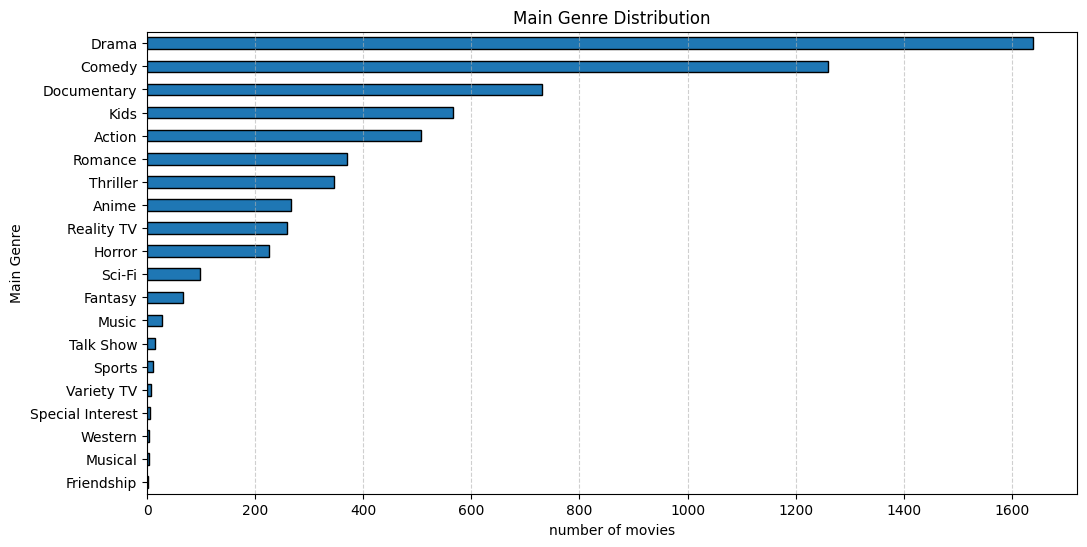

In [15]:
genre = netflix[['Main Genre', 'Sub Genres']]
genre_sorted = genre['Main Genre'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
genre_sorted.plot(kind='barh', edgecolor='black')
plt.title('Main Genre Distribution')
plt.ylabel('Main Genre')
plt.xlabel('number of movies')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

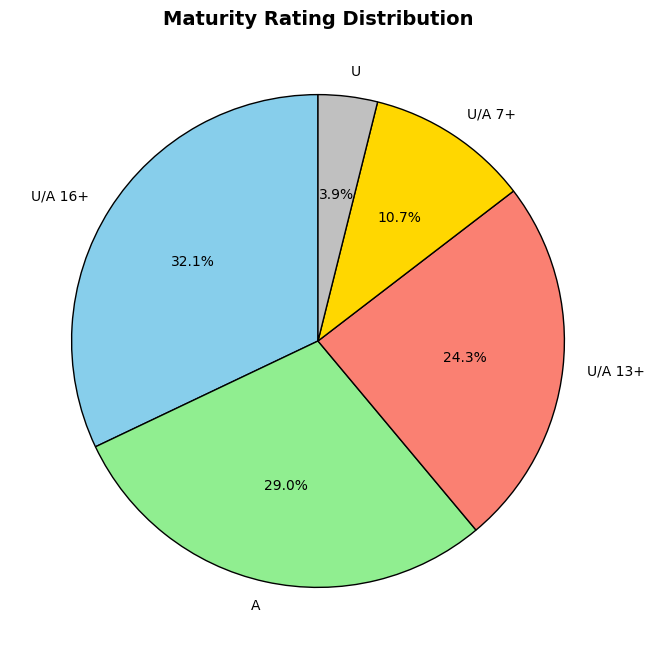

In [16]:
age = netflix["Maturity Rating"].value_counts()

plt.figure(figsize=(8, 8))
age.plot(kind='pie', 
         autopct='%1.1f%%', 
         colors=['skyblue', 'lightgreen', 'salmon', 'gold', 'silver'], 
         startangle=90,          
         wedgeprops={'edgecolor': 'black'}) 

plt.title('Maturity Rating Distribution', fontsize=14, fontweight='bold')
plt.ylabel('') 
plt.show()


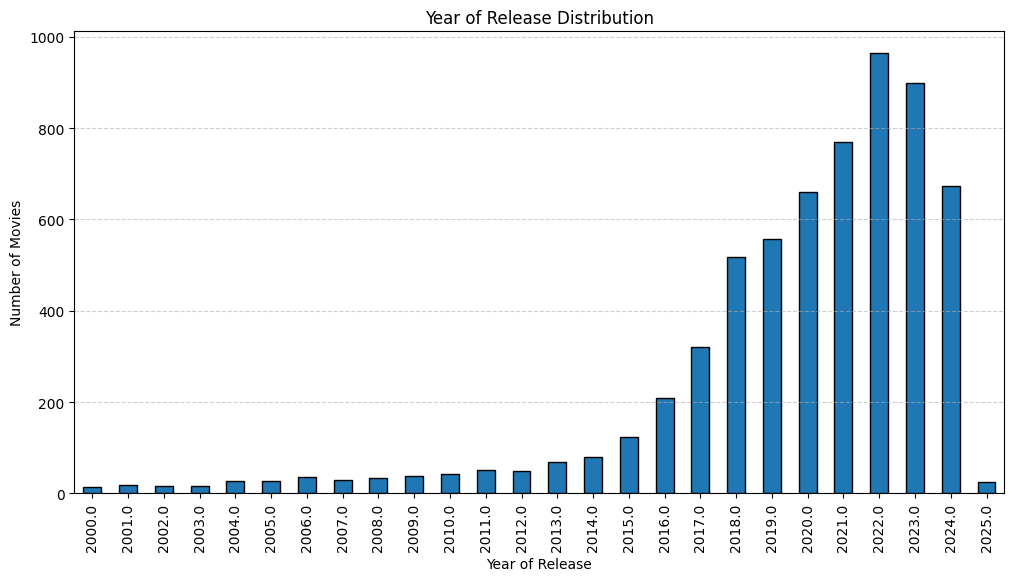

In [17]:
year_of_release = netflix[netflix['Release Year'] >= 2000]['Release Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_of_release.plot(kind='bar', edgecolor='black')
plt.title('Year of Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

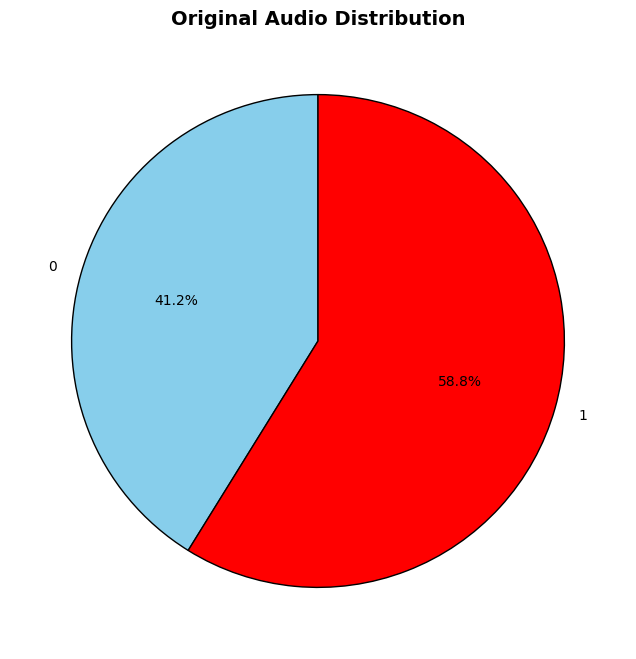

In [18]:
original_audio = netflix['has original audio'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 8))
original_audio.plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     wedgeprops={'edgecolor': 'black'},
                     colors=["skyblue","red"],)
plt.title('Original Audio Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

In [19]:
netflix.head(5)

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Recommendations,has original audio
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"(70184054, 60001650, 70112729, 70027007, 11524...",1
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"(70184054, 60001650, 70112729, 70027007, 11524...",1
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"(81156676, 81231974, 70027007, 80049939, 70217...",1
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"(81156676, 70044593, 81231974, 70027007, 80050...",1
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,"(17517355, 80158546, 80158395, 80074065, 70204...",1


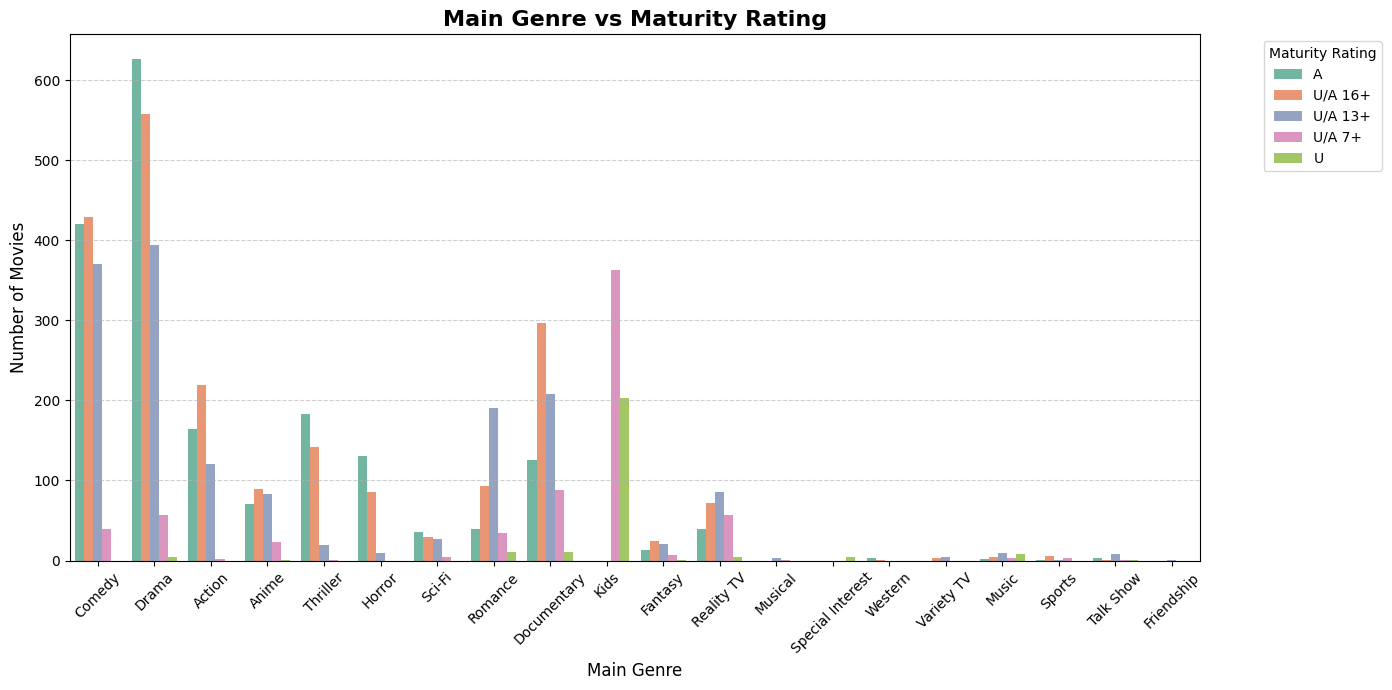

In [20]:
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.countplot(data=netflix, x='Main Genre', hue='Maturity Rating', palette='Set2')
plt.title("Main Genre vs Maturity Rating", fontsize=16, fontweight='bold')
plt.xlabel("Main Genre", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Maturity Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

